In [50]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
%matplotlib inline 

from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage.color import rgb2gray
from scipy.spatial.distance import squareform
from scipy.misc import imread
from transparent_imshow import transp_imshow
import matplotlib.cm as cm
from scipy import ndimage, misc

import sys
sys.path.append("..")


In [51]:
from src.merge_dfs import merge

In [52]:
all_files = glob.glob('../data/classification/*')

In [53]:
int(all_files[1].split('/')[3].split('_')[0])

425

In [54]:
whitespace_dict = {164: 200.2, 202: 200.5, 425: 208., 345: 237.4, 72: 216.2, 363: 247.7, 509: 207.9, 257: 201.2, 203: 250.8, 183: 252.4}
files_by_img_dict = {k: [] for k in whitespace_dict.keys()}

In [55]:
files_by_img_dict

{164: [],
 202: [],
 425: [],
 345: [],
 72: [],
 363: [],
 509: [],
 257: [],
 203: [],
 183: []}

In [56]:
for file in all_files:
    file_key = int(file.split('/')[3].split('_')[0])
    files_by_img_dict[file_key].append(file)

In [57]:
files_by_img_dict

{164: ['../data/classification/164_img_239.csv',
  '../data/classification/164_img_95.csv',
  '../data/classification/164_img_423.csv',
  '../data/classification/164_img_342.csv'],
 202: ['../data/classification/202_img_103.csv',
  '../data/classification/202_img_370.csv',
  '../data/classification/202_img_405.csv',
  '../data/classification/202_img_450.csv'],
 425: ['../data/classification/425_img_119.csv',
  '../data/classification/425_img_120.csv',
  '../data/classification/425_img_350.csv',
  '../data/classification/425_img_472.csv',
  '../data/classification/425_img_473.csv'],
 345: ['../data/classification/345_img_293.csv',
  '../data/classification/345_img_292.csv',
  '../data/classification/345_img_337.csv',
  '../data/classification/345_img_382.csv',
  '../data/classification/345_img_410.csv'],
 72: ['../data/classification/72_img_392.csv',
  '../data/classification/72_img_164.csv'],
 363: ['../data/classification/363_img_416.csv',
  '../data/classification/363_img_300.csv',
 

In [58]:
df_164 = merge(files_by_img_dict[164])
df_202 = merge(files_by_img_dict[202])
df_425 = merge(files_by_img_dict[425])
df_345 = merge(files_by_img_dict[345])
df_72 = merge(files_by_img_dict[72])
df_363 = merge(files_by_img_dict[363])
df_509 = merge(files_by_img_dict[509])
df_257 = merge(files_by_img_dict[257])
df_203 = merge(files_by_img_dict[203])
df_183 = merge(files_by_img_dict[183])
whitespace_dict = {164: 200.2, 202: 200.5, 425: 208., 345: 237.4, 72: 216.2, 363: 247.7, 509: 207.9, 257: 201.2, 203: 250.8, 183: 252.4}
df_dict = {164: [df_164, 200.2], 202: [df_202, 200.5], 425: [df_425, 208.], 345: [df_345, 237.4], 72: [df_72, 216.2], 363: [df_363, 247.7], 509: [df_509, 207.9], 257: [df_257, 201.2], 203: [df_203, 250.8], 183: [df_183, 252.4]}

In [59]:
def add_pixel_difference(df, pixel):
    df['pixel_diff'] = df.gray_pixel_value.apply(lambda x: pixel - x)
    df['mean_pixel_diff'] = df.mean_gray_pixel_value.apply(lambda x: pixel - x)

In [60]:
for key, item in df_dict.items():
    add_pixel_difference(item[0], item[1])

In [61]:
result_df_list = []
for key in df_dict.keys():
    df = df_dict[key][0]
    result_df_list.append(df)

In [62]:
result = pd.concat(result_df_list, axis=0, ignore_index=True)

In [63]:
lines = result[result.label == 1]
drawings = result[result.label == 0]

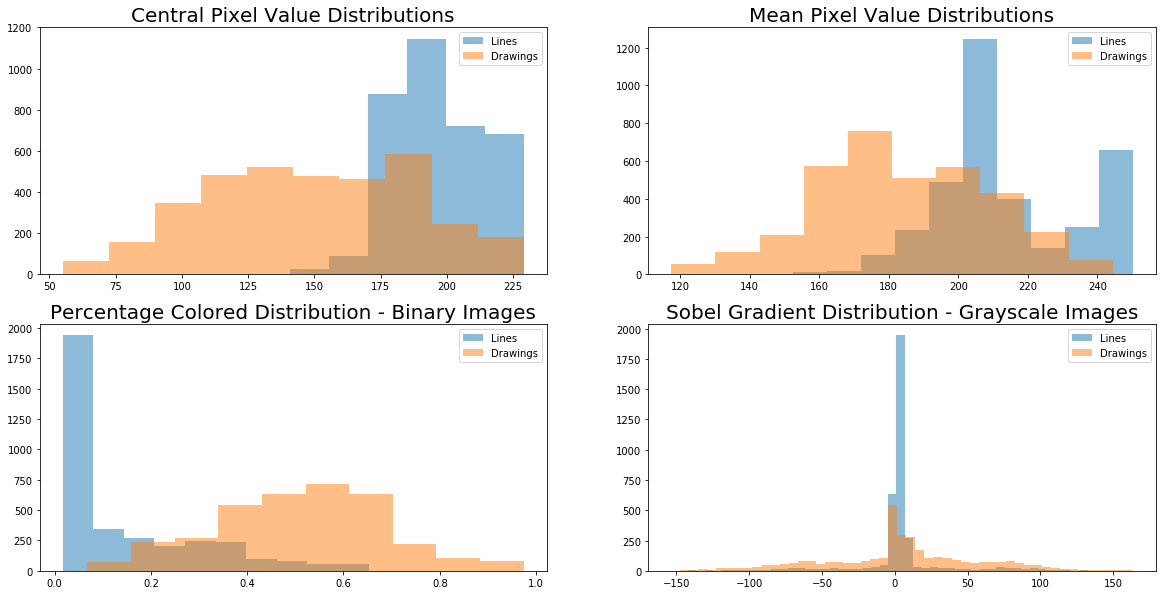

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].hist(lines.gray_pixel_value, alpha=0.5, label = 'Lines')
ax[0][0].hist(drawings.gray_pixel_value, alpha=0.5, label = 'Drawings')
ax[0][0].set_title('Central Pixel Value Distributions', fontsize=20)
ax[0][0].legend()
ax[0][1].hist(lines.mean_gray_pixel_value, alpha=0.5, label = 'Lines')
ax[0][1].hist(drawings.mean_gray_pixel_value, alpha=0.5, label = 'Drawings')
ax[0][1].set_title('Mean Pixel Value Distributions', fontsize=20)
ax[0][1].legend()
ax[1][0].hist(lines.bin_percentage_colored, alpha=0.5, label = 'Lines')
ax[1][0].hist(drawings.bin_percentage_colored, alpha=0.5, label = 'Drawings')
ax[1][0].set_title('Percentage Colored Distribution - Binary Images', fontsize=20)
ax[1][0].legend()
ax[1][1].hist(lines.sobel_gradient, alpha=0.5, label = 'Lines', bins = 50)
ax[1][1].hist(drawings.sobel_gradient, alpha=0.5, label = 'Drawings', bins = 50)
ax[1][1].set_title('Sobel Gradient Distribution - Grayscale Images', fontsize=20)
ax[1][1].legend()


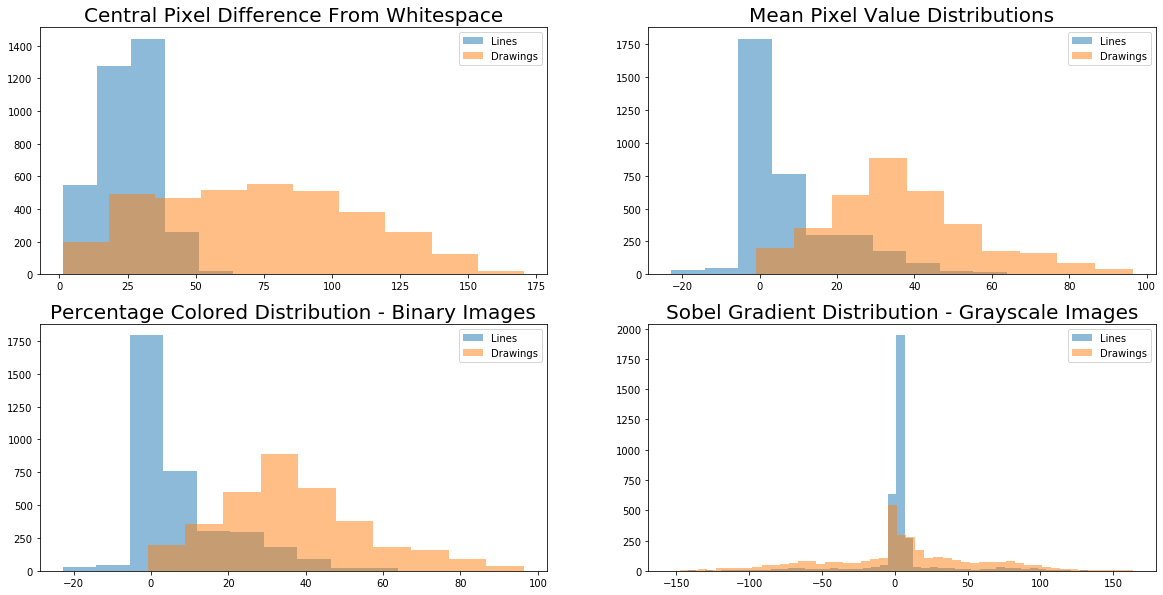

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].hist(lines.pixel_diff, alpha=0.5, label = 'Lines')
ax[0][0].hist(drawings.pixel_diff, alpha=0.5, label = 'Drawings')
ax[0][0].set_title('Central Pixel Difference From Whitespace', fontsize=20)
ax[0][0].legend()
ax[0][1].hist(lines.mean_pixel_diff, alpha=0.5, label = 'Lines')
ax[0][1].hist(drawings.mean_pixel_diff, alpha=0.5, label = 'Drawings')
ax[0][1].set_title('Mean Pixel Value Distributions', fontsize=20)
ax[0][1].legend()
ax[1][0].hist(lines.mean_pixel_diff, alpha=0.5, label = 'Lines')
ax[1][0].hist(drawings.mean_pixel_diff, alpha=0.5, label = 'Drawings')
ax[1][0].set_title('Percentage Colored Distribution - Binary Images', fontsize=20)
ax[1][0].legend()
ax[1][1].hist(lines.sobel_gradient, alpha=0.5, label = 'Lines', bins = 50)
ax[1][1].hist(drawings.sobel_gradient, alpha=0.5, label = 'Drawings', bins = 50)
ax[1][1].set_title('Sobel Gradient Distribution - Grayscale Images', fontsize=20)
ax[1][1].legend()


In [68]:
result.to_csv('../data/classification/result.csv', columns = result.columns)

In [69]:
result

,gray_pixel_value,mean_gray_pixel_value,bin_percentage_colored,sobel_gradient,label,label_t1,label_t2,label_t3,pixel_diff,mean_pixel_diff
0,199.0,218.904444,0.025556,0.107143,1,-1.0,-1.0,-1.0,1.2,-18.704444
1,196.0,213.333333,0.031111,0.107143,1,1.0,-1.0,-1.0,4.2,-13.133333
2,194.0,207.853333,0.037778,0.107143,1,1.0,1.0,-1.0,6.2,-7.653333
3,198.0,204.863333,0.063333,0.107143,1,1.0,1.0,1.0,2.2,-4.663333
4,199.0,201.814444,0.116667,0.107143,1,1.0,1.0,1.0,1.2,-1.614444
...,...,...,...,...,...,...,...,...,...,...
7059,211.0,249.341111,0.040000,3.035714,1,1.0,1.0,1.0,41.4,3.058889
7060,212.0,249.505556,0.037778,3.125000,1,1.0,1.0,1.0,40.4,2.894444
7061,212.0,249.658889,0.035556,3.196429,1,1.0,1.0,1.0,40.4,2.741111
7062,214.0,249.807778,0.033333,3.357143,1,1.0,1.0,1.0,38.4,2.592222
